# Machine Learning Python Exercise 3.2: Neural Networks

In [1]:
import numpy as np # linear algebra
from numpy import loadtxt, where
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
from scipy.stats import logistic # sigmoid function
import scipy.optimize as opt
import scipy.io

import os
print(os.listdir("../ex3"))

['.ipynb_checkpoints', 'ex3data1.csv', 'ex3data1.mat', 'ex3data1.txt', 'ex3Theta1weights.csv', 'ex3Theta2weights.csv', 'ex3weights.mat', 'ex3weights.txt', 'Ex3_part_1.ipynb', 'Ex3_part_2.ipynb']


## Instructions

This file  contains code that helps you get started on the exercise. You will need to complete functions in this exercise. The instructions can be found in this notebook, which will load the  program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset. You will be working with a dataset that contains handwritten digits.

In [3]:
data = scipy.io.loadmat('ex3data1.mat') # load in the data from the provided .mat file

X = data["X"]
y = data["y"]
m = len(y)

theta = scipy.io.loadmat('ex3weights.mat') # load in the weights from the provided .mat file

theta1 = theta['Theta1']
theta2 = theta['Theta2']

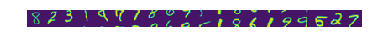

In [4]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

## Part 2: Implement Predict
After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

## Complete this predict file
Predict the label of an input given a trained neural network p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the trained weights of a neural network (Theta1, Theta2).

Instructions: Complete the following code to make predictions using
              your learned neural network. You should set p to a 
              vector containing labels between 1 to num_labels.

In [5]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    ## Your code
    
    # correct answer
    X = np.column_stack((np.ones((m,1)), X)) # is the same as a1

    a2 = logistic.cdf(np.dot(X, Theta1.T) ) # sigmoid(X * theta1')

    a2 = np.column_stack((np.ones((a2.shape[0], 1)), a2)) # add row of ones

    a3 = logistic.cdf(np.dot(a2, Theta2.T) ) # sigmoid(a2)

    pred = np.argmax(a3, axis=1)

    return pred + 1 # compensates for python's starting index of 0

In [6]:
pred = predict(theta1, theta2, X)

print('\nTraining Set Accuracy: %f \n' % (np.mean(np.double(pred == y)) * 100))

pred = pred[:, np.newaxis]

def accuracy_score_new(y_pred, y_true):
    matched = 0 # initialize number of correct answers
    for y_p, y_t in zip(y_pred, y_true): # loop over all predicted and real values
        if y_t in y_p:
            matched = matched + 1 # add 1 to for each correctly predicted answer

    return (matched / len(y_true)) * 100 # returns the number of correct answers divided 
                                            # by number of total predictions * 100

accuracy = accuracy_score_new(pred,y)

# of right predictions/accuracy
print('Train Accuracy: %f' % accuracy, '%')


Training Set Accuracy: 10.000000 

Train Accuracy: 97.520000 %
